# Import Libraries and Data

In [4]:
!pip install pandas matplotlib seaborn



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
!pip list


Package                   Version
------------------------- --------------
anyio                     4.8.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 3.0.0
async-lru                 2.0.4
attrs                     25.1.0
babel                     2.17.0
beautifulsoup4            4.13.3
bleach                    6.2.0
certifi                   2025.1.31
cffi                      1.17.1
charset-normalizer        3.4.1
colorama                  0.4.6
comm                      0.2.2
contourpy                 1.3.1
cycler                    0.12.1
debugpy                   1.8.12
decorator                 5.2.1
defusedxml                0.7.1
executing                 2.2.0
fastjsonschema            2.21.1
fonttools                 4.56.0
fqdn                      1.5.1
h11                       0.14.0
httpcore                  1.0.7
httpx                     0.28.1
idna                      3.10
ipykernel     

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("C:/Users/Dell/OneDrive/Desktop/New folder/DA/Projects/LokSabha/election_results_2024.csv")

In [5]:
data.head()

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared


In [6]:
data

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared
...,...,...,...,...,...,...,...,...
538,Wardha,8,AMAR SHARADRAO KALE,Nationalist Congress Party – Sharadchandra Pawar,RAMDAS CHANDRABHAN TADAS,Bharatiya Janata Party,81648,Result Declared
539,Wayanad,4,RAHUL GANDHI,Indian National Congress,ANNIE RAJA,Communist Party of India,364422,Result Declared
540,West Delhi,6,KAMALJEET SEHRAWAT,Bharatiya Janata Party,MAHABAL MISHRA,Aam Aadmi Party,199013,Result Declared
541,Yavatmal- Washim,14,SANJAY UTTAMRAO DESHMUKH,Shiv Sena (Uddhav Balasaheb Thackrey),RAJSHRITAI HEMANT PATIL (MAHALLE),Shiv Sena,94473,Result Declared


# Party with Highest and Lowest Margin

In [8]:
party_votes=data.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)
data['Margin']=pd.to_numeric(data['Margin'],errors='coerce')
highest_margin=data.loc[data['Margin'].idxmax()]
lowest_margin=data.loc[data['Margin'].idxmin()]

# Plot number of seats won by each party

C:\Users\Dell\AppData\Local\Temp\ipykernel_28540\3972759124.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seats_won.index, y=seats_won.values, palette='viridis')


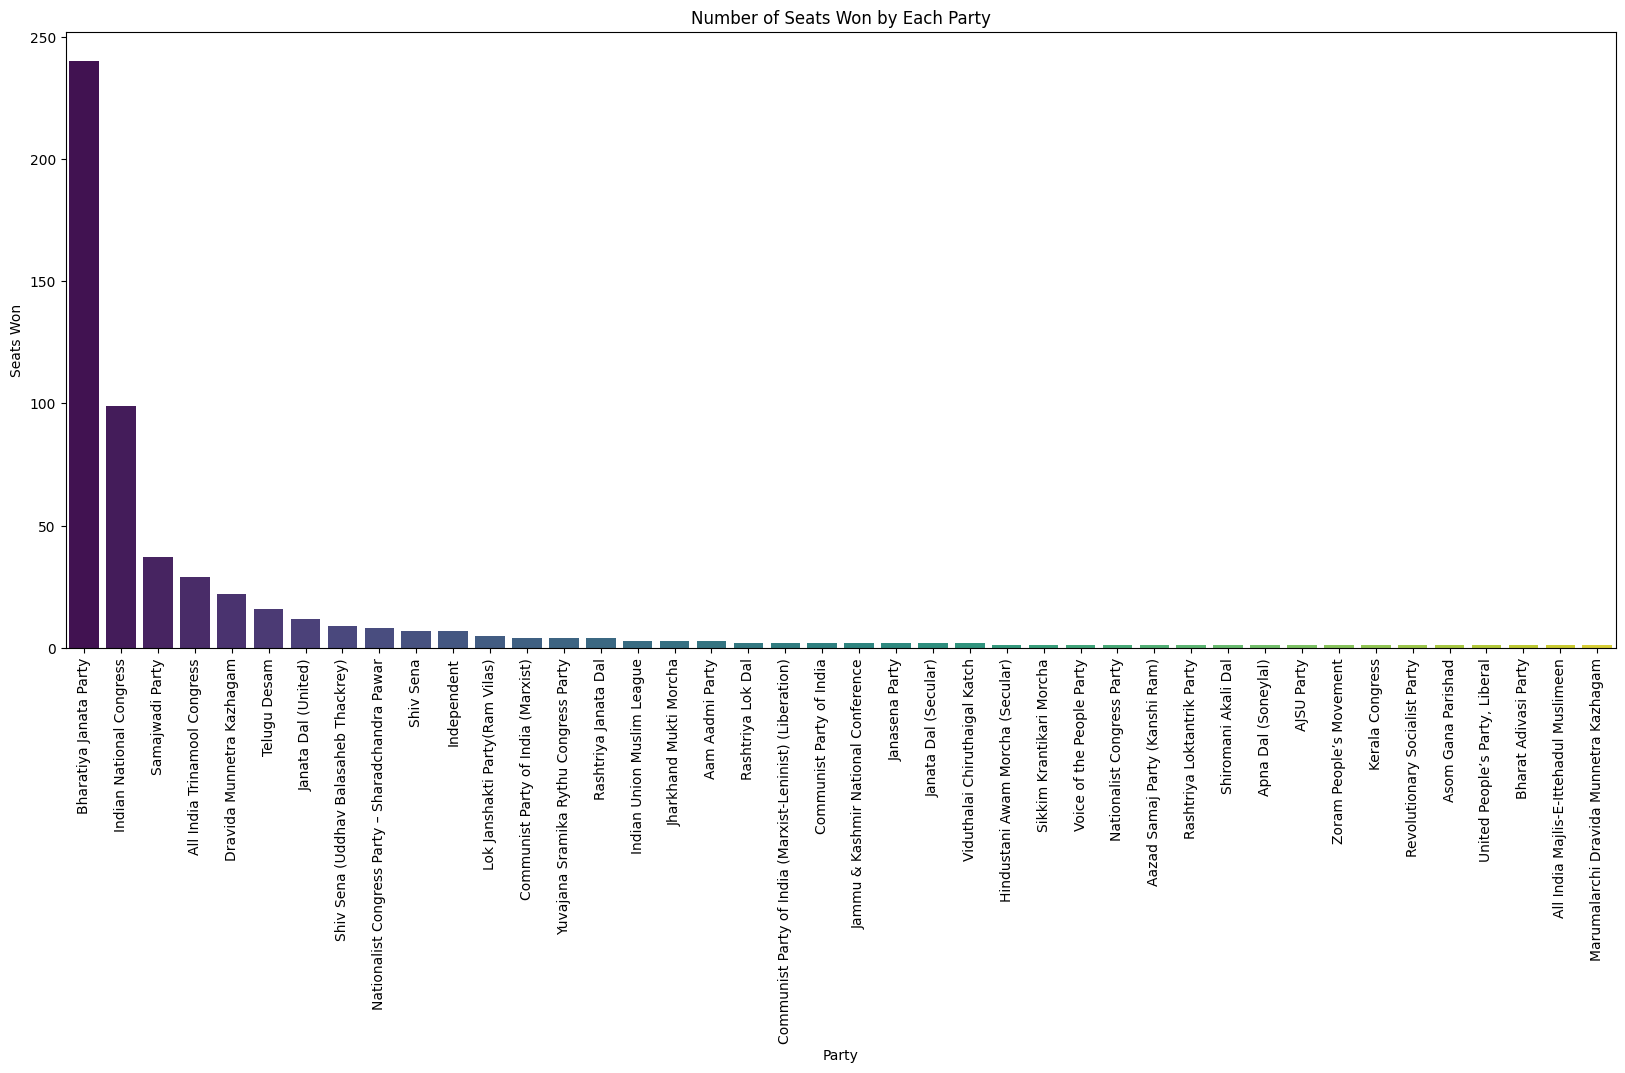

In [23]:
leading_party_highest_votes=party_votes.idxmax()
leading_party_lowest_votes=party_votes.idxmin()
seats_won=data['Leading Party'].value_counts()

plt.figure(figsize=(20,8))
sns.barplot(x=seats_won.index, y=seats_won.values, palette='viridis')
plt.title('Number of Seats Won by Each Party')
plt.xlabel('Party')
plt.ylabel('Seats Won')
plt.xticks(rotation=90)
plt.show()

# Get the votes for Rahul Gandhi, Narendra Modi and Amit Shah

In [17]:
rahul_entries=data[data['Leading Candidate']=='RAHUL GANDHI']
modi_entries=data[data['Leading Candidate']=='NARENDRA MODI']
amit_entries=data[data['Leading Candidate']=='AMIT SHAH']

rahul_votes=rahul_entries['Margin'].values
modi_votes=modi_entries['Margin'].values[0] if not modi_entries.empty else 0
amit_votes=amit_entries['Margin'].values[0] if not amit_entries.empty else 0

#Create original constituency name
rahul_constituency=list(rahul_entries['Constituency'])
modi_constituency=modi_entries['Constituency'].values[0] if not modi_entries.empty else "Mo"
amit_constituency=amit_entries['Constituency'].values[0] if not amit_entries.empty else "Am"

#Combine the data
data_to_plot=pd.DataFrame({
    'Candidate':['Rahul Gandhi']* len(rahul_votes) + ['Narendra Modi','Amit Shah'],
    'Constituency':rahul_constituency+[modi_constituency,amit_constituency],
    'votes':list(rahul_votes) + [modi_votes,amit_votes]
})

# Plot the comparision

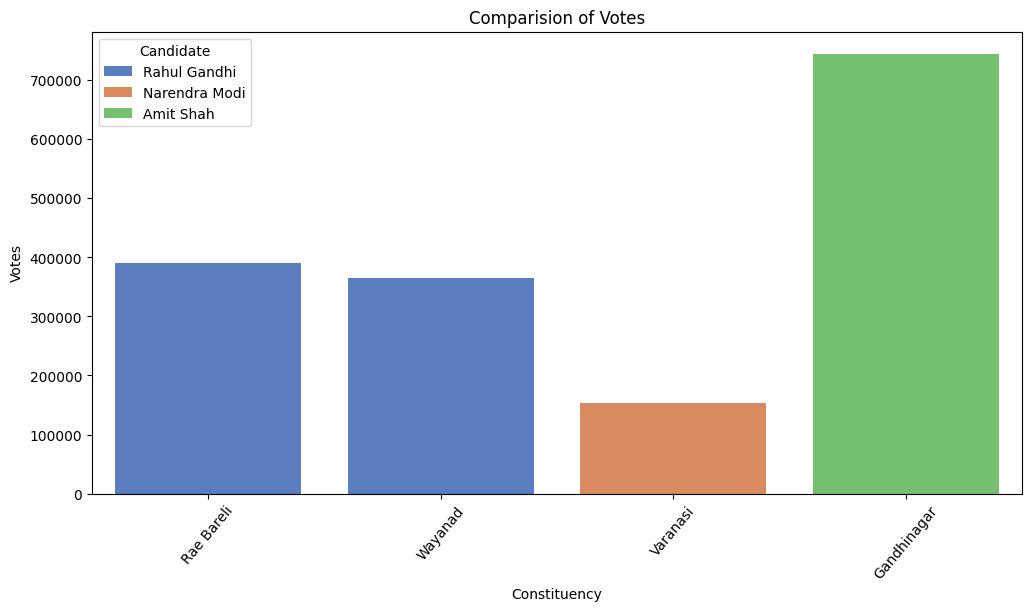

In [22]:
plt.figure(figsize=(12,6))
sns.barplot(data=data_to_plot,x='Constituency', y='votes',hue='Candidate', palette='muted')
plt.title('Comparision of Votes')
plt.xlabel('Constituency')
plt.ylabel('Votes')
plt.xticks(rotation=50)
plt.show()

# Highest and Lowest Victory Candidate

In [25]:
highest_margin_entry=data.loc[data['Margin'].idxmax()]
lowest_margin_entry=data.loc[data['Margin'].idxmin()]

#Combine the data
data_to_plot=pd.DataFrame({
    'Candidate':[highest_margin_entry['Leading Candidate'],lowest_margin_entry['Leading Candidate']],
    'Party':[highest_margin_entry['Leading Party'],lowest_margin_entry['Leading Party']],
    'Margin':[highest_margin_entry['Margin'],lowest_margin_entry['Margin']]
})           

# Plot the Margin

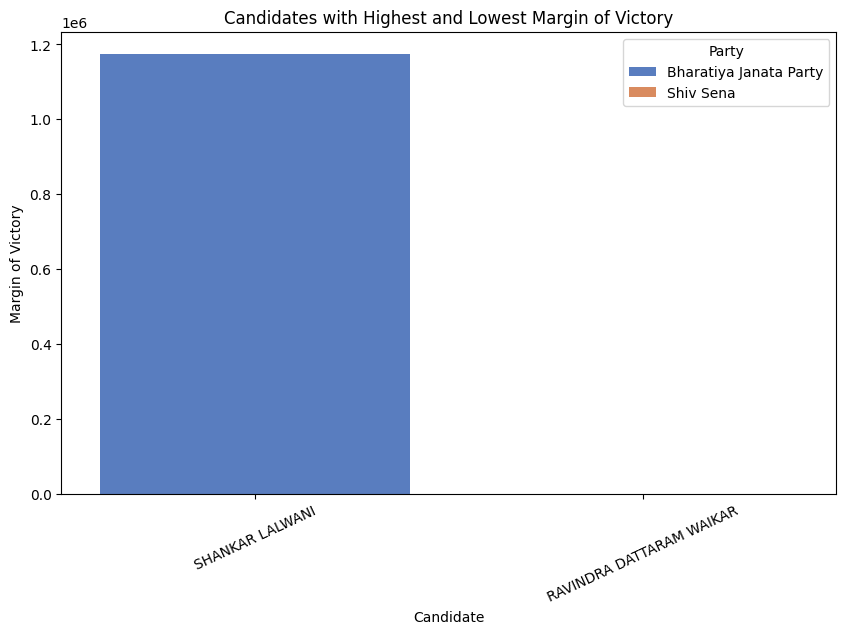

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(data=data_to_plot,x='Candidate',y='Margin',hue='Party',palette='muted')
plt.title('Candidates with Highest and Lowest Margin of Victory')
plt.xlabel('Candidate')
plt.ylabel('Margin of Victory')
plt.xticks(rotation=25)
plt.show()

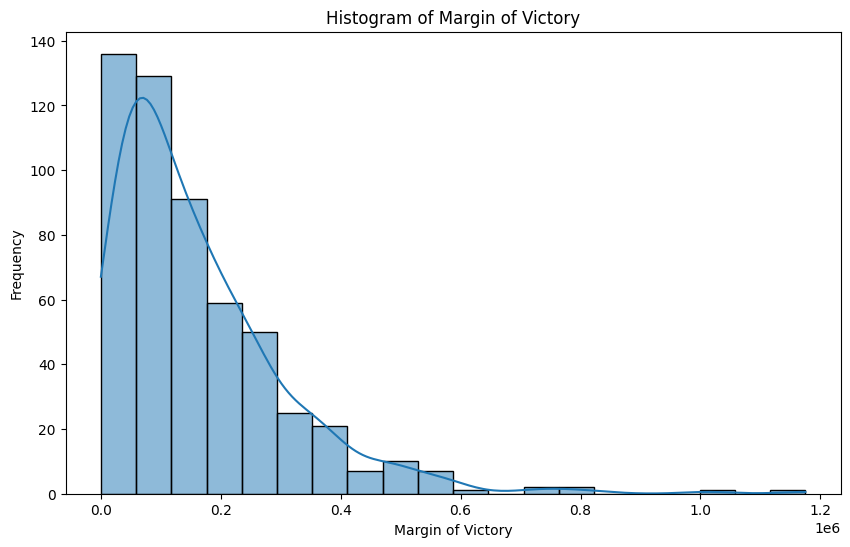

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Margin'], bins=20, kde=True)
plt.title('Histogram of Margin of Victory')
plt.xlabel('Margin of Victory')
plt.ylabel('Frequency')
plt.show()

# Votes Distribution by Party

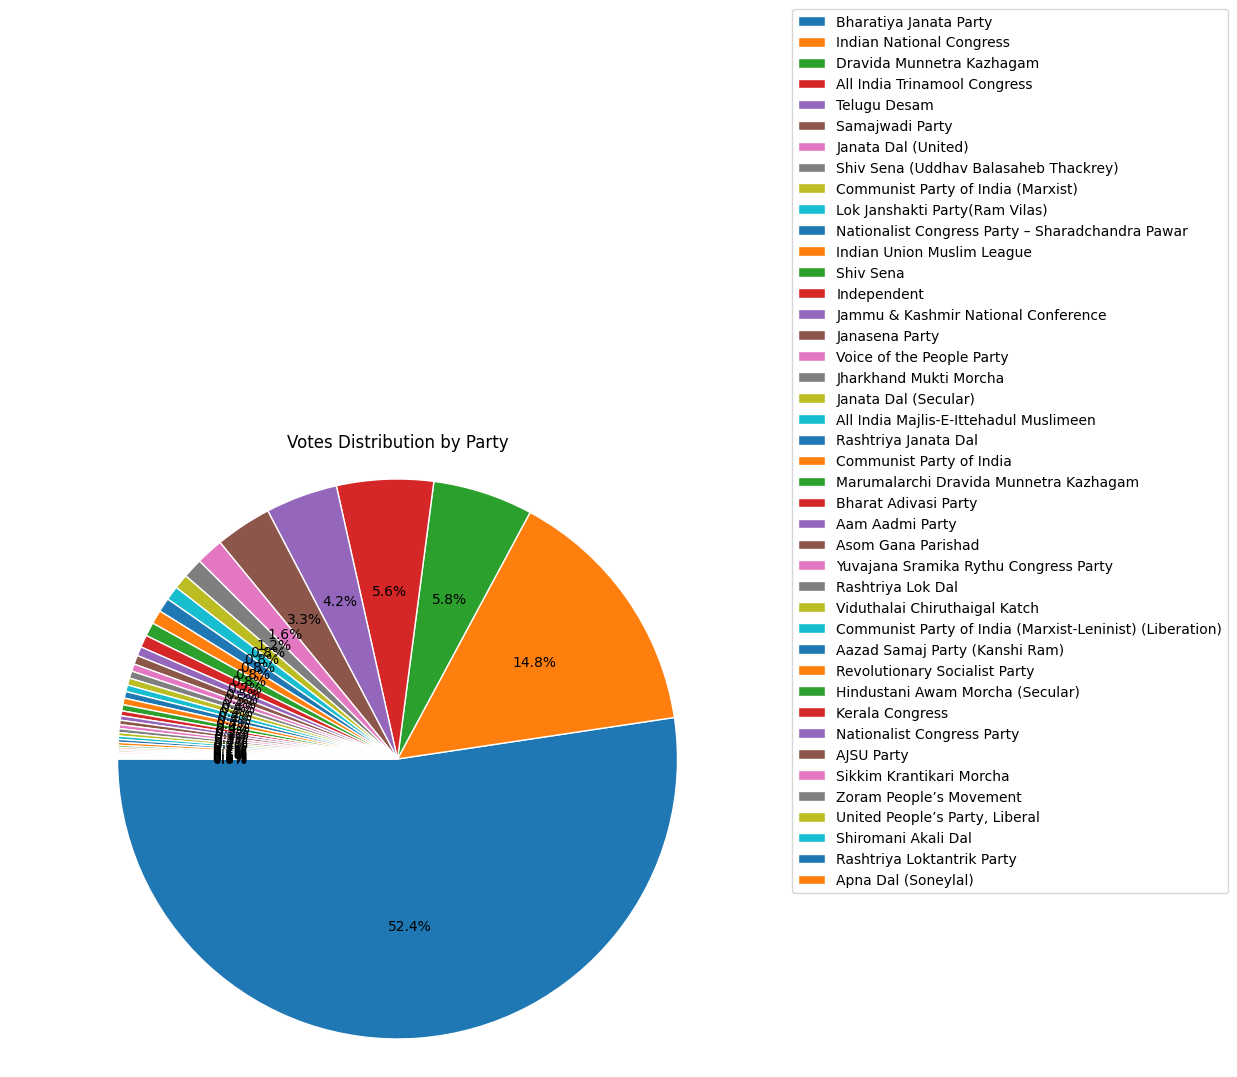

In [48]:
party_votes=data.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)

#Plot pie chart
plt.figure(figsize=(10,8))
wedges,texts,autotexts=plt.pie(party_votes,labels=None,autopct='%1.1f%%',startangle=180,wedgeprops=dict(edgecolor='w'))
plt.title('Votes Distribution by Party',pad=1)
plt.axis('equal')
plt.legend(labels=party_votes.index, loc='center left',bbox_to_anchor=(1,1),fontsize='medium')
plt.show()

# Top 10 Trailing Party by Vote

In [49]:
trailing_party_votes=data.groupby('Trailing Party')['Margin'].sum().sort_values(ascending=False)
trailing_party_seats=data['Trailing Party'].value_counts()

C:\Users\Dell\AppData\Local\Temp\ipykernel_28540\1932800341.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trailing_party_votes.index[:10],y=trailing_party_votes.values[:10],palette='viridis')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Indian National Congress'),
  Text(1, 0, 'Bharatiya Janata Party'),
  Text(2, 0, 'All India Anna Dravida Munnetra Kazhagam'),
  Text(3, 0, 'Yuvajana Sramika Rythu Congress Party'),
  Text(4, 0, 'Communist Party of India (Marxist)'),
  Text(5, 0, 'Samajwadi Party'),
  Text(6, 0, 'Biju Janata Dal'),
  Text(7, 0, 'Rashtriya Janata Dal'),
  Text(8, 0, 'Bahujan Samaj Party'),
  Text(9, 0, 'Aam Aadmi Party')])

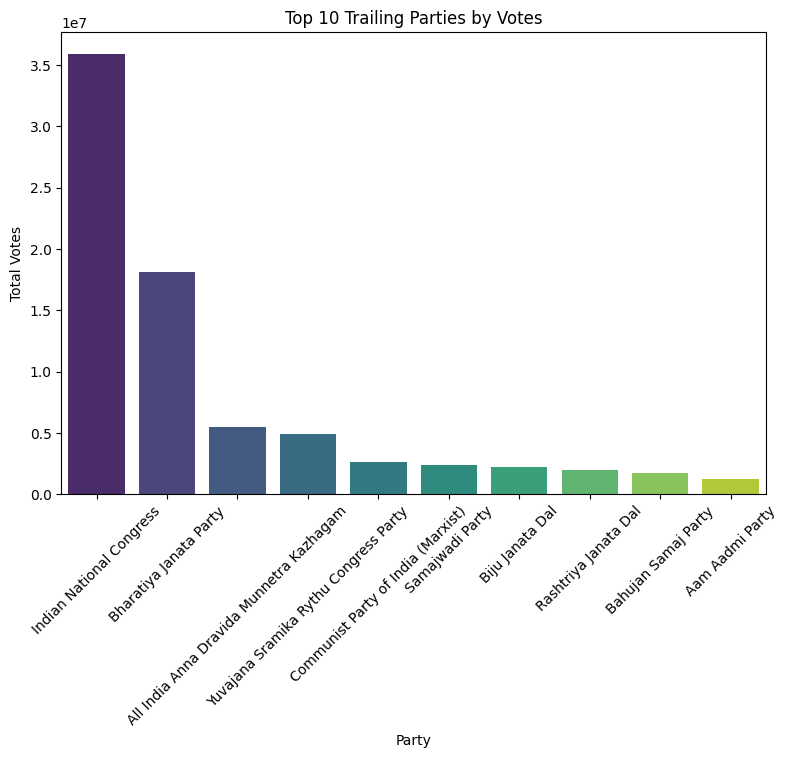

In [50]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.barplot(x=trailing_party_votes.index[:10],y=trailing_party_votes.values[:10],palette='viridis')
plt.title('Top 10 Trailing Parties by Votes')
plt.xlabel('Party')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)

# Top 10 Trailing Party by Seat

C:\Users\Dell\AppData\Local\Temp\ipykernel_28540\2831736773.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trailing_party_seats.index[:10],y=trailing_party_seats.values[:10],palette='viridis')


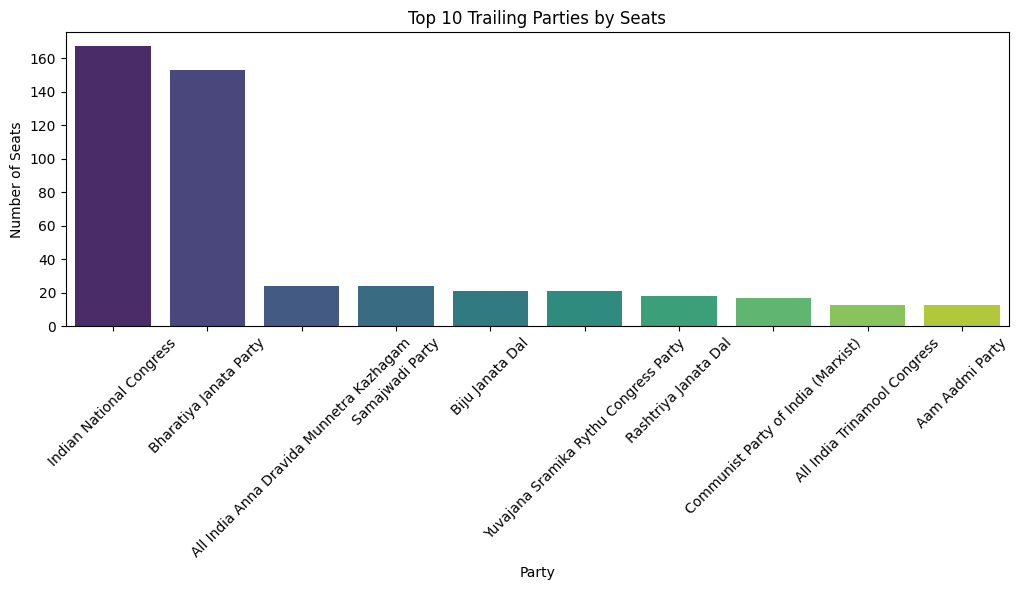

In [51]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,2)
sns.barplot(x=trailing_party_seats.index[:10],y=trailing_party_seats.values[:10],palette='viridis')
plt.title('Top 10 Trailing Parties by Seats')
plt.xlabel('Party')
plt.ylabel('Number of Seats')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()